<aside>
💡 **Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

</aside>

In [1]:
def findPermutation(s):
    n = len(s)
    perm = []
    curr = 1

    for i in range(n):
        if s[i] == 'I':
            perm.append(curr)
            curr += 1
        elif s[i] == 'D':
            k = 0
            while i < n and s[i] == 'D':
                k += 1
                i += 1
            for j in range(curr + k, curr - 1, -1):
                perm.append(j)
            curr += k + 1

    perm.append(curr)
    return perm

In [2]:
s = "IDID"
perm = findPermutation(s)
print(perm)

[1, 3, 2, 4, 6, 5, 7]


<aside>
💡 **Question 2**

You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**

</aside>

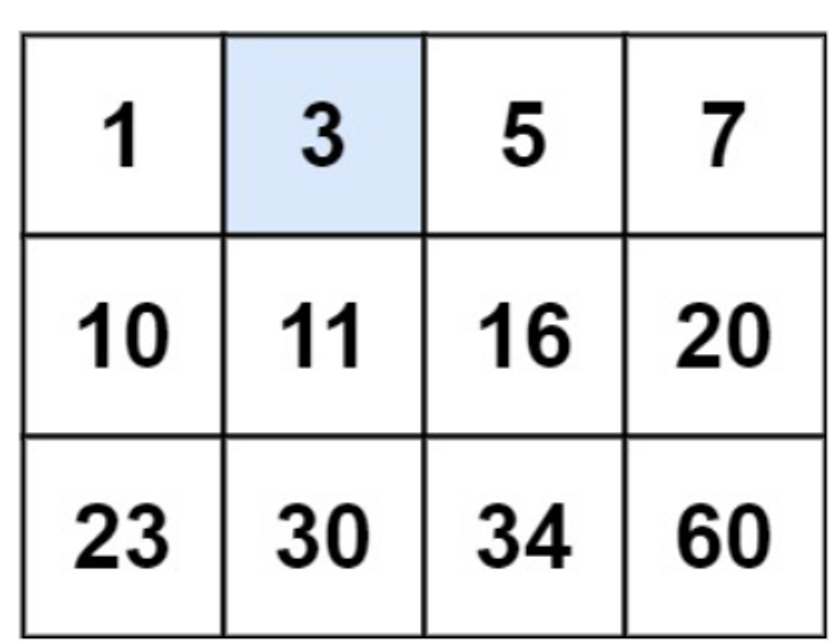

**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true

In [3]:
def searchMatrix(matrix, target):
    m = len(matrix)
    n = len(matrix[0])
    left = 0
    right = m * n - 1
    
    while left <= right:
        mid = (left + right) // 2
        row = mid // n
        col = mid % n
        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            left = mid + 1
        else:
            right = mid - 1
    
    return False

In [4]:
matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
target = 3
print(searchMatrix(matrix, target))

True


<aside>
💡 **Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]
</aside>

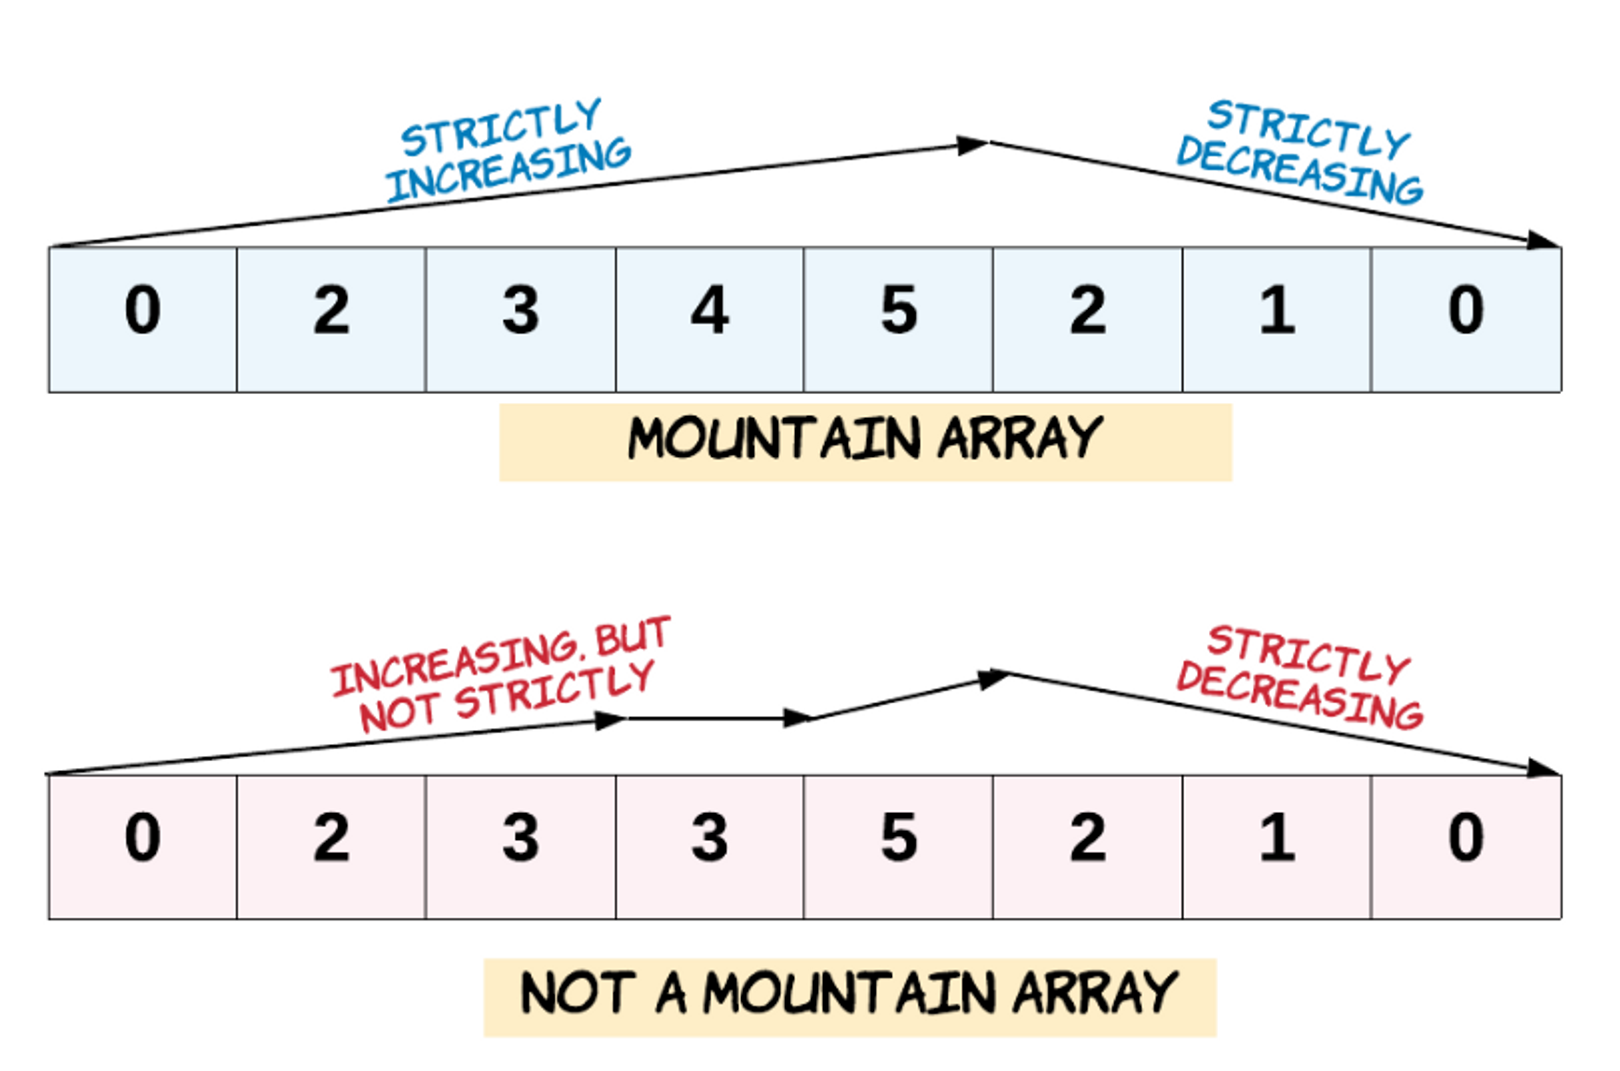

**Example 1:**

**Input:** arr = [2,1]

**Output:**

false

In [5]:
def validMountainArray(arr):
    n = len(arr)
    
    if n < 3:
        return False
    
    i = 1
    while i < n and arr[i] > arr[i-1]:
        i += 1
    
    if i == 1 or i == n:
        return False
    
    while i < n and arr[i] < arr[i-1]:
        i += 1
    
    return i == n

In [6]:
arr = [2, 1]
print(validMountainArray(arr))

False


<aside>
💡 **Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

</aside>

In [7]:
def findMaxLength(nums):
    maxLen = 0
    count = 0
    seen = {0: -1}  # Initialize with the sum 0 at index -1 (before the array starts)

    for i in range(len(nums)):
        if nums[i] == 1:
            count += 1
        else:
            count -= 1

        if count in seen:
            maxLen = max(maxLen, i - seen[count])
        else:
            seen[count] = i

    return maxLen

nums = [0, 1]
print(findMaxLength(nums))

<aside>
💡 **Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

</aside>

In [8]:
def minProductSum(nums1, nums2):
    nums1.sort()
    nums2.sort(reverse=True)
    
    minProductSum = 0
    n = len(nums1)
    
    for i in range(n):
        minProductSum += nums1[i] * nums2[i]
    
    return minProductSum

In [9]:
nums1 = [5, 3, 4, 2]
nums2 = [4, 2, 2, 5]
print(minProductSum(nums1, nums2))

40


<aside>
💡 **Question 6**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

</aside>

In [10]:
def findOriginalArray(changed):
    if len(changed) % 2 != 0:
        return []  # If the length of the changed array is odd, it can't be a valid doubled array

    original = []
    num_set = set()

    for num in changed:
        if num / 2 in num_set:
            num_set.remove(num / 2)
            original.append(int(num / 2))
        elif num in num_set:
            return []  # If the current element is already in the set, it's not a valid doubled array
        else:
            num_set.add(num)

    if len(num_set) > 0:
        return []  # If there are any remaining elements in the set, it's not a valid doubled array

    return original

In [11]:
changed = [1, 3, 4, 2, 6, 8]
original = findOriginalArray(changed)
print(original)

[1, 3, 4]


<aside>
💡 **Question 7**

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**

</aside>

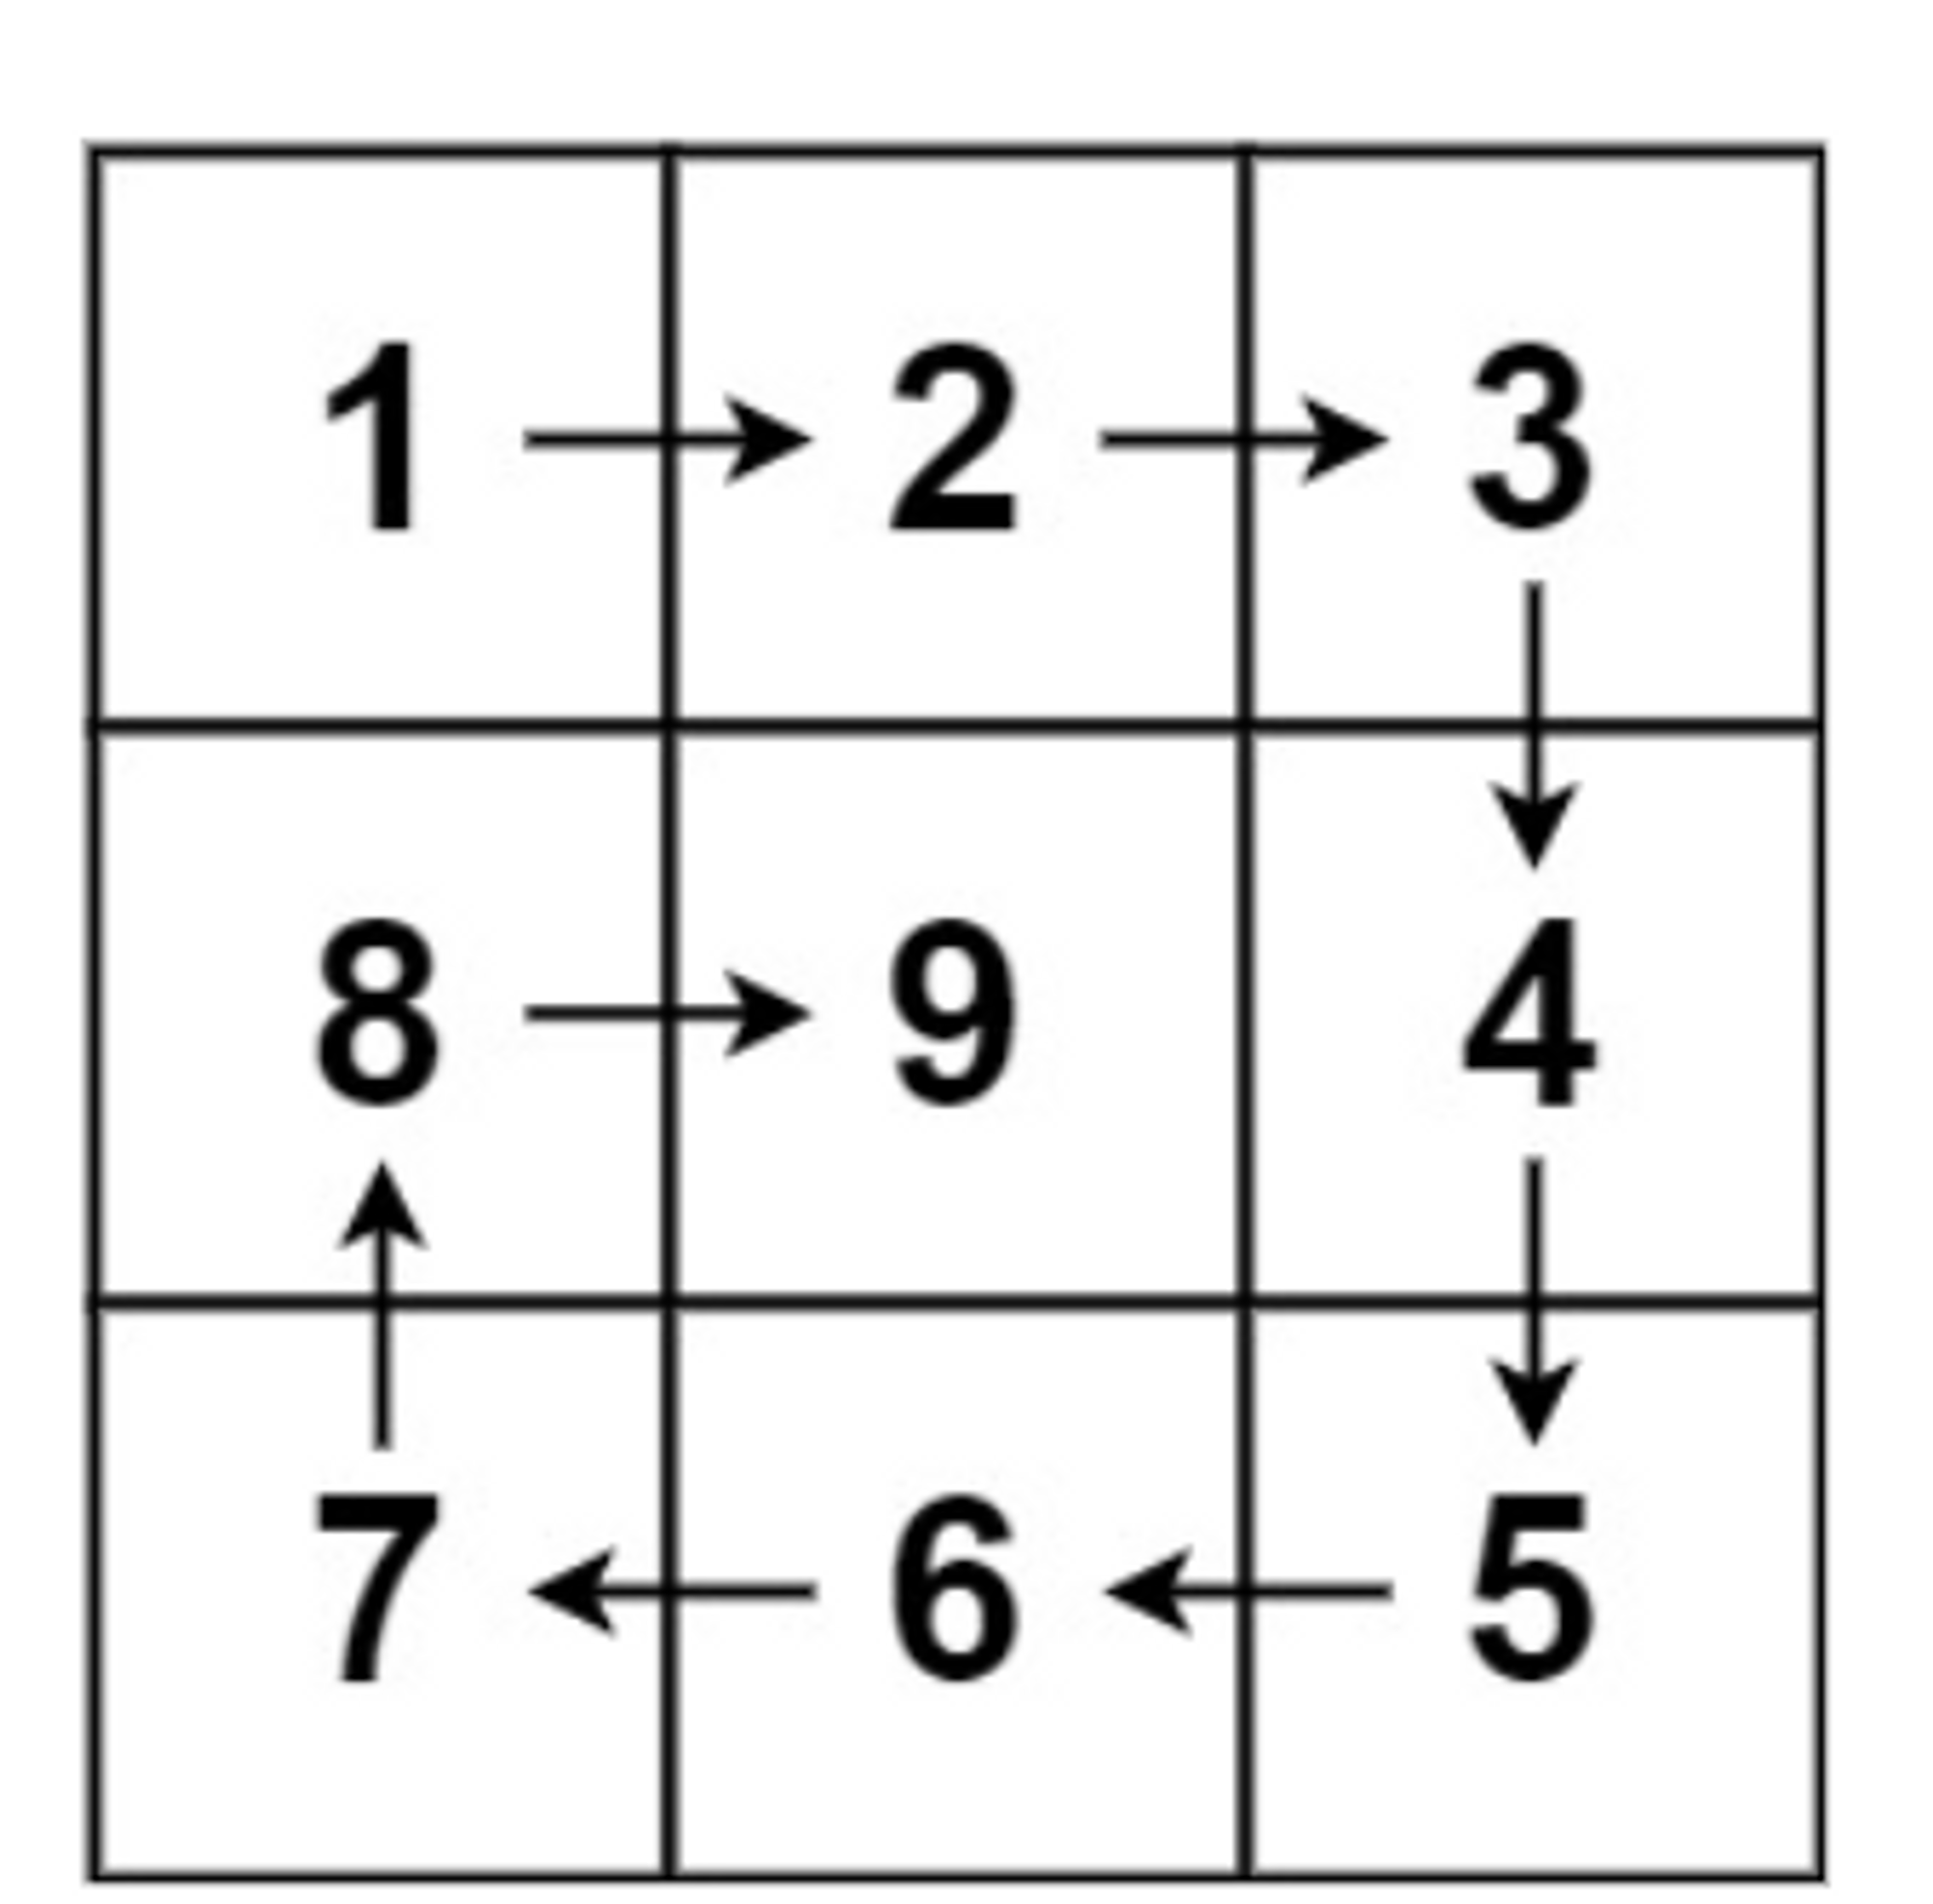

**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]

In [12]:
def generateMatrix(n):
    matrix = [[0] * n for _ in range(n)]
    num = 1
    rowStart, rowEnd, colStart, colEnd = 0, n - 1, 0, n - 1

    while rowStart <= rowEnd and colStart <= colEnd:
        # Fill top row
        for col in range(colStart, colEnd + 1):
            matrix[rowStart][col] = num
            num += 1
        rowStart += 1

        # Fill right column
        for row in range(rowStart, rowEnd + 1):
            matrix[row][colEnd] = num
            num += 1
        colEnd -= 1

        if rowStart <= rowEnd and colStart <= colEnd:
            # Fill bottom row
            for col in range(colEnd, colStart - 1, -1):
                matrix[rowEnd][col] = num
                num += 1
            rowEnd -= 1

            # Fill left column
            for row in range(rowEnd, rowStart - 1, -1):
                matrix[row][colStart] = num
                num += 1
            colStart += 1

    return matrix

In [13]:
n = 3
spiralMatrix = generateMatrix(n)
print(spiralMatrix)

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]


<aside>
💡 **Question 8**

Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**

</aside>

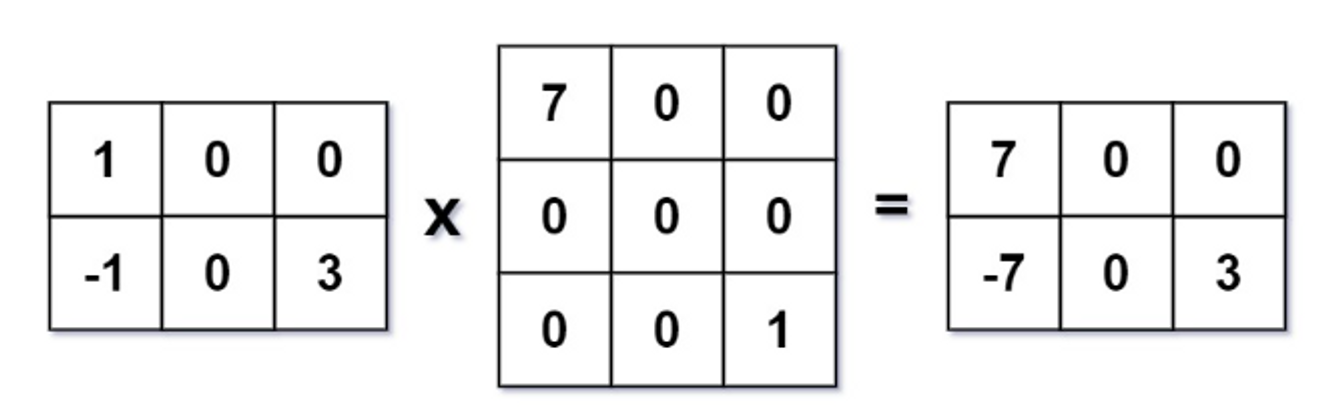

**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]

In [14]:
def multiply(mat1, mat2):
    m = len(mat1)
    k = len(mat1[0])
    n = len(mat2[0])
    result = [[0] * n for _ in range(m)]

    for i in range(m):
        for j in range(n):
            for x in range(k):
                result[i][j] += mat1[i][x] * mat2[x][j]

    return result

In [15]:
mat1 = [[1,0,0],[-1,0,3]]
mat2 = [[7,0,0],[0,0,0],[0,0,1]]

result = multiply(mat1, mat2)
print(result)

[[7, 0, 0], [-7, 0, 3]]
